In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import the data set
data = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')
print(data.head())
print("Attributes (Column names):")
#print some statistics
print(data.columns)
print(data.count())
print(data.dtypes)

     FILENAME                                 URL  URLLength  \
0  521848.txt    https://www.southbankmosaics.com         31   
1   31372.txt            https://www.uni-mainz.de         23   
2  597387.txt      https://www.voicefmradio.co.uk         29   
3  554095.txt         https://www.sfnmjournal.com         26   
4  151578.txt  https://www.rewildingargentina.org         33   

                       Domain  DomainLength  IsDomainIP  TLD  \
0    www.southbankmosaics.com            24           0  com   
1            www.uni-mainz.de            16           0   de   
2      www.voicefmradio.co.uk            22           0   uk   
3         www.sfnmjournal.com            19           0  com   
4  www.rewildingargentina.org            26           0  org   

   URLSimilarityIndex  CharContinuationRate  TLDLegitimateProb  ...  Pay  \
0               100.0              1.000000           0.522907  ...    0   
1               100.0              0.666667           0.032650  ...    0   
2 

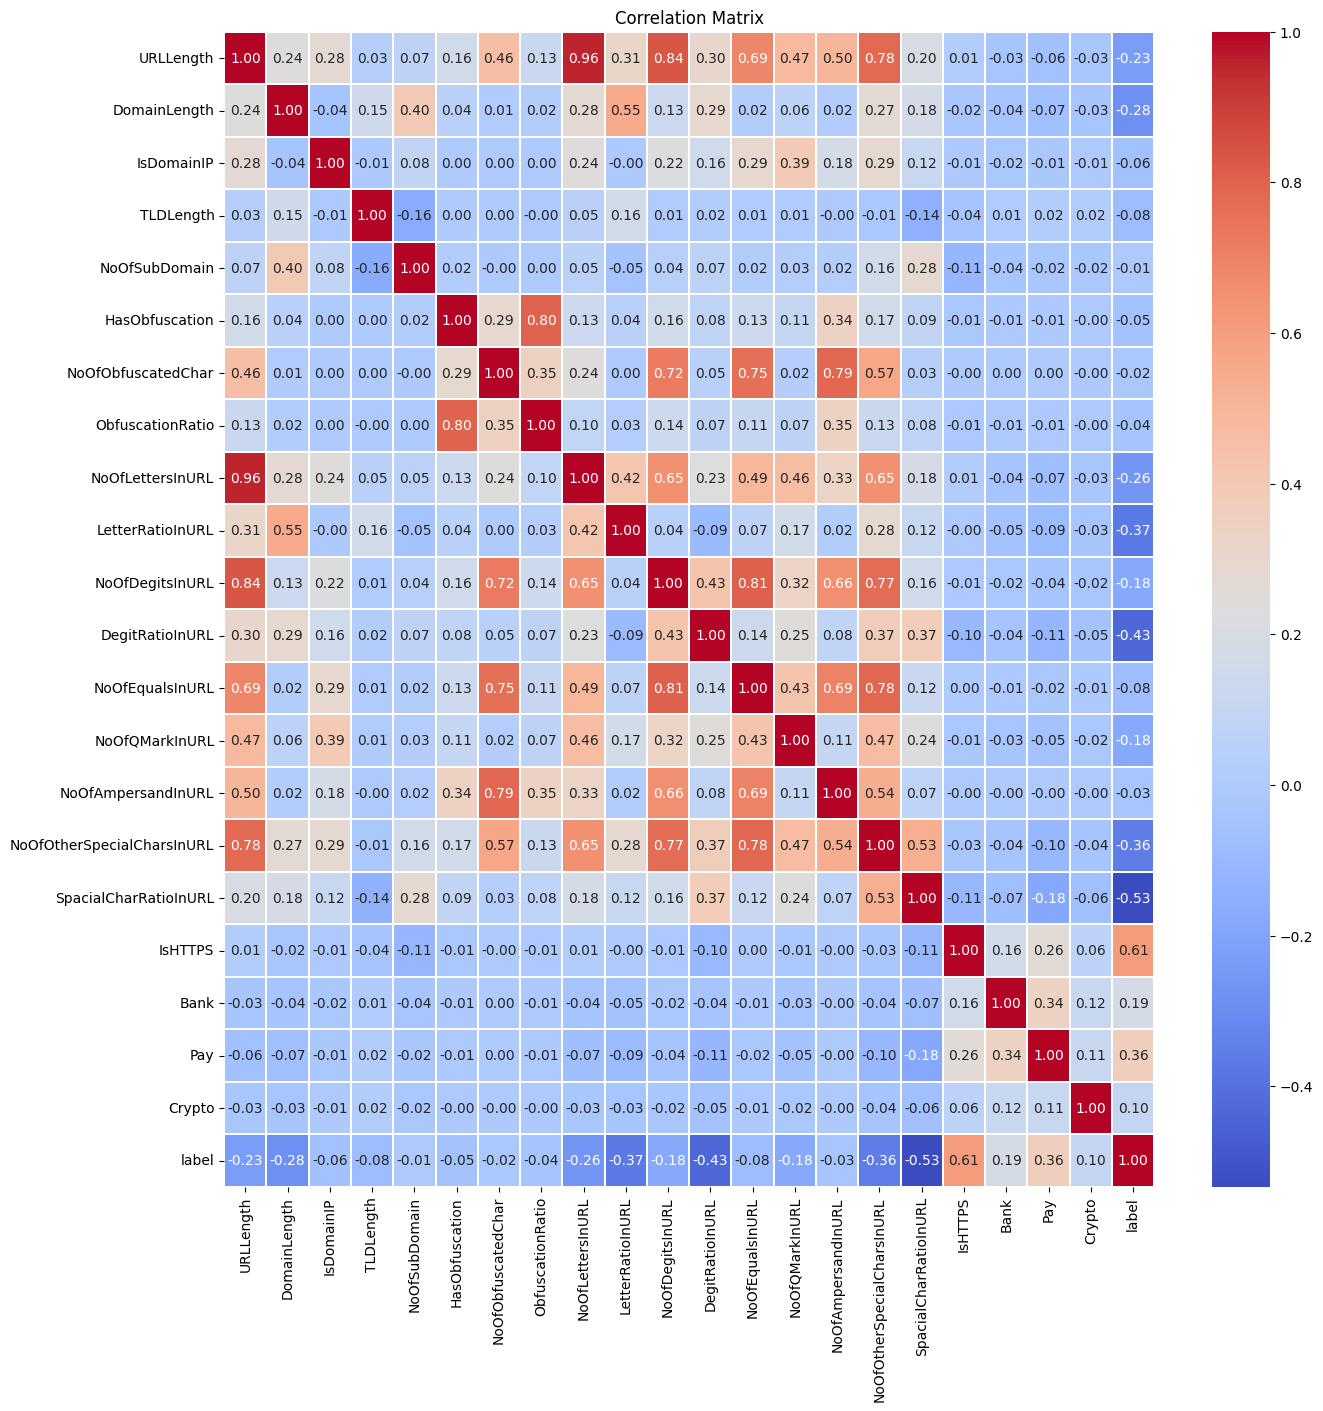

In [2]:
#dropping text based columns for correlation matrix
data = data.drop(columns=['FILENAME']) #given to remove, this is simpily a ID
data = data.drop(columns=['URL']) #is https, domain related info, and TLD is already attributes
data = data.drop(columns=['Domain']) 
data = data.drop(columns=['Title']) 
data = data.drop(columns=['TLD']) 

#dropping columns that would make it difficult for user to query
data = data.drop(columns=['CharContinuationRate']) 
data = data.drop(columns=['URLTitleMatchScore', 'DomainTitleMatchScore']) 
data = data.drop(columns=['URLCharProb']) 
data = data.drop(columns=['TLDLegitimateProb']) 
data = data.drop(columns=['URLSimilarityIndex']) 

#experimental, drop all features that require HTML website info 
data = data.drop(columns=['Robots', 'NoOfSelfRedirect', 'NoOfCSS', 'LineOfCode', 'LargestLineLength','HasTitle', 'HasFavicon', 'IsResponsive', 'NoOfURLRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasCopyrightInfo', 'HasSocialNet', 'HasPasswordField', 'HasSubmitButton', 'HasHiddenFields', 'NoOfImage', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']) 


cor = data.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(cor, cmap='coolwarm', linewidths=0.2, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [3]:
#more preprocessing
print(data.head())
numeric_data = data.select_dtypes(include=['number'])
variance = numeric_data.var()
zero_variance_columns = variance[variance == 0].index
data = data.drop(columns=zero_variance_columns) #drop columns with zero variance
print(data.head()) 

#dropping the 96% correlation column of #Of Letters in the URL
data = data.drop(columns=['NoOfLettersInURL']) 

   URLLength  DomainLength  IsDomainIP  TLDLength  NoOfSubDomain  \
0         31            24           0          3              1   
1         23            16           0          2              1   
2         29            22           0          2              2   
3         26            19           0          3              1   
4         33            26           0          3              1   

   HasObfuscation  NoOfObfuscatedChar  ObfuscationRatio  NoOfLettersInURL  \
0               0                   0               0.0                18   
1               0                   0               0.0                 9   
2               0                   0               0.0                15   
3               0                   0               0.0                13   
4               0                   0               0.0                20   

   LetterRatioInURL  ...  NoOfEqualsInURL  NoOfQMarkInURL  NoOfAmpersandInURL  \
0             0.581  ...                0      

In [30]:
x = data.drop(columns=['label'])
y = data['label']
print(x.columns)

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'Bank', 'Pay', 'Crypto'],
      dtype='object')


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=10)

Training time: 0.11864 sec
Inference time: 0.00869 sec
FPR: 0.025581995355944964
FNR: 0.008709691753936433
Accuracy: 0.98408
F1 Score: 0.98617
Accuracy Score on All Folds: [0.98153057 0.98371467 0.98460527 0.98392672 0.98399033]
Average Score on All Folds (Mean): 0.9835535104645985
F1 Score on All Folds: [0.98384973 0.98579199 0.9866022  0.98601166 0.98607653]
F1 Score on All Folds (Mean): 0.9856664231047232
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     50387
           1       0.98      0.99      0.99     67511

    accuracy                           0.98    117898
   macro avg       0.98      0.98      0.98    117898
weighted avg       0.98      0.98      0.98    117898



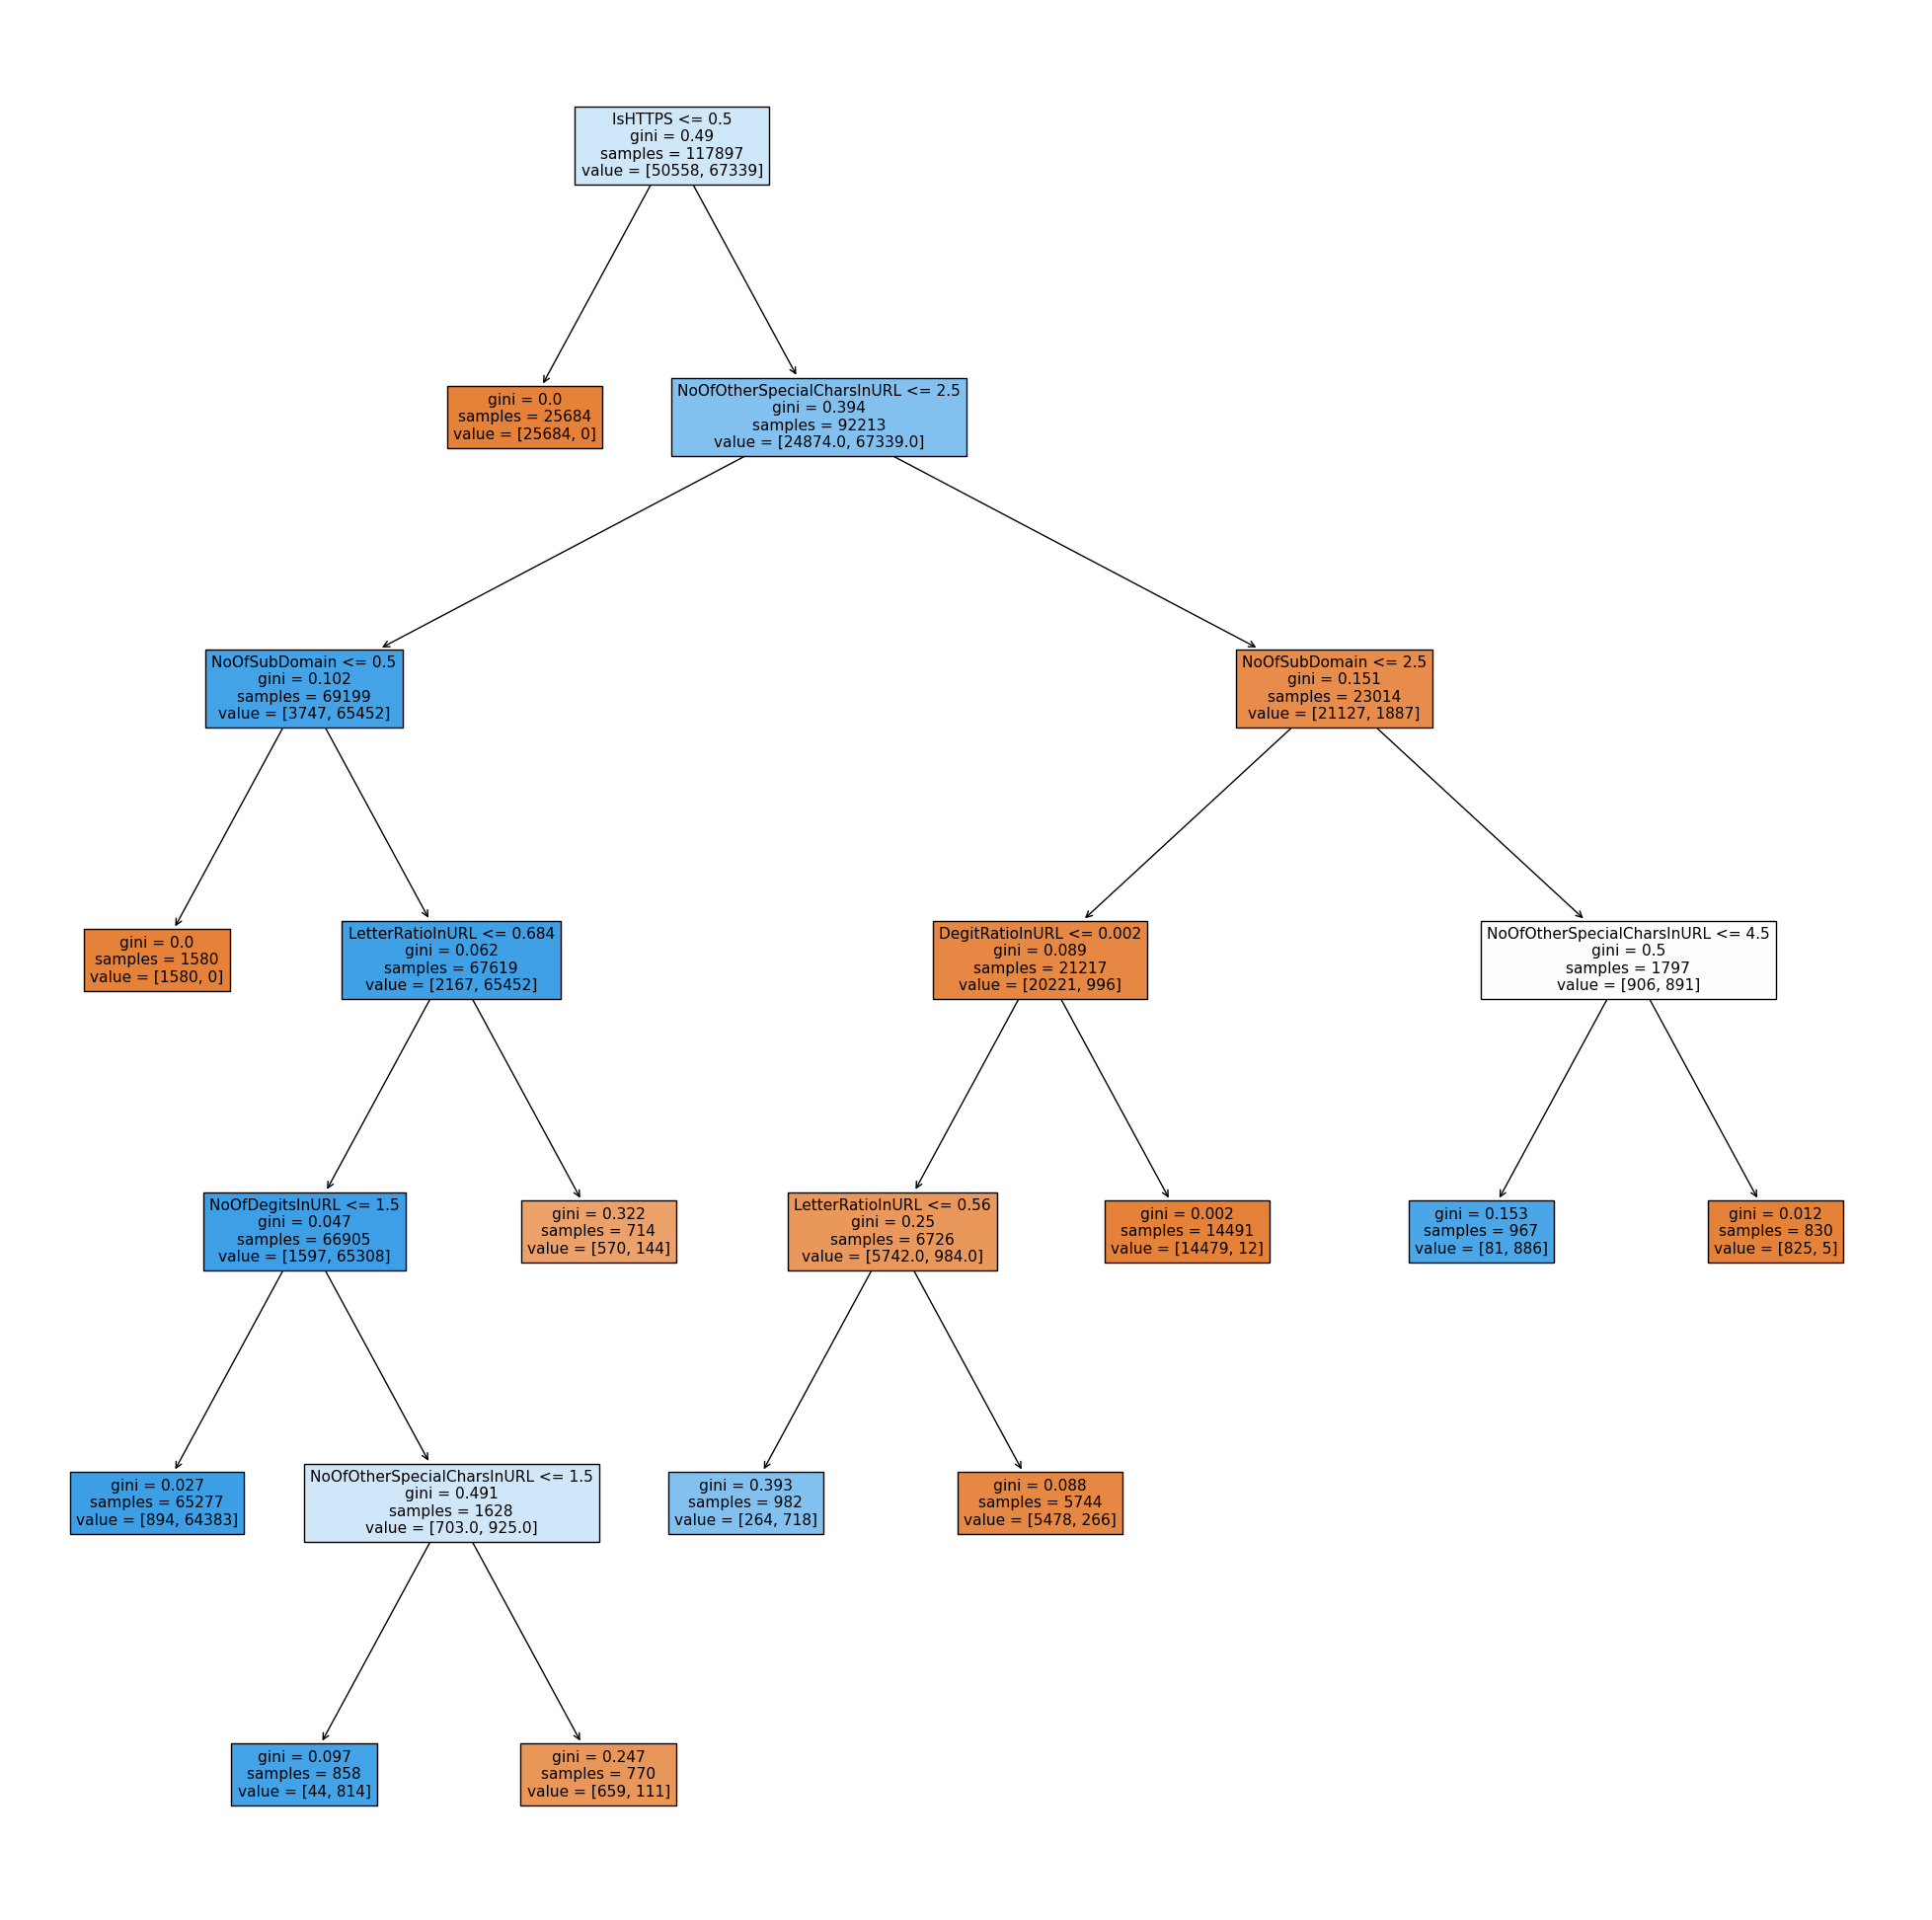

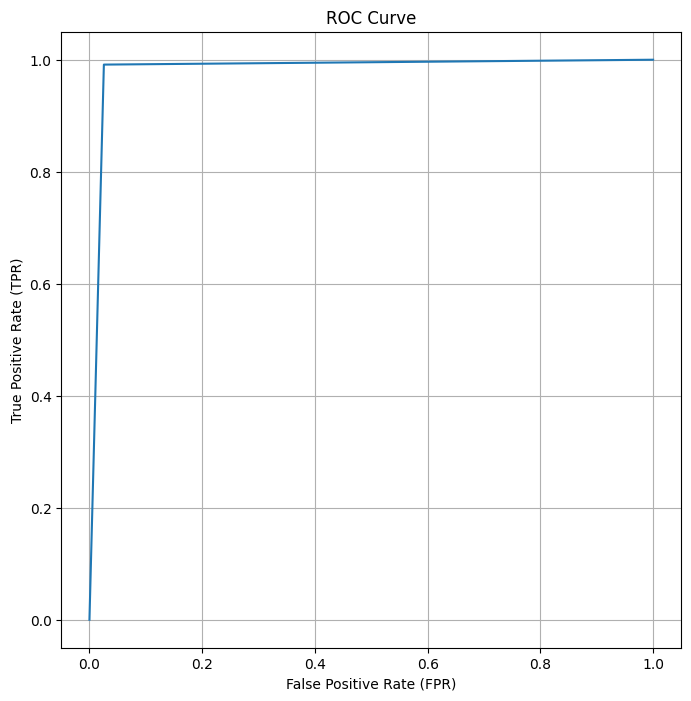

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
import pickle
import time
from sklearn.metrics import recall_score


start_time = time.time()

model = DecisionTreeClassifier(ccp_alpha=0.003) #apply a postpruning to reduce tree complexity 
model.fit(x_train, y_train)

end_time = time.time()
print(f'Training time: {end_time - start_time:.5f} sec')

start_time = time.time()
y_prediction = model.predict(x_test)
end_time = time.time()
print(f'Inference time: {end_time - start_time:.5f} sec')

tpr = recall_score(y_test, y_prediction)
tnr = recall_score(y_test, y_prediction, pos_label = 0)
print("FPR:", 1-tnr)
print("FNR:", 1-tpr)

f1 = f1_score(y_test, y_prediction)
accuracy = accuracy_score(y_test, y_prediction)

print(f'Accuracy: {accuracy:.5f}')
print(f'F1 Score: {f1:.5f}')

cv_score = cross_val_score(model, x, y, scoring='accuracy')
print(f"Accuracy Score on All Folds: {cv_score}")
print(f"Average Score on All Folds (Mean): {cv_score.mean()}")

cv_score = cross_val_score(model, x, y, scoring='f1')
print(f"F1 Score on All Folds: {cv_score}")
print(f"F1 Score on All Folds (Mean): {cv_score.mean()}")

print(classification_report(y_test, y_prediction, zero_division=0))

fig = plt.figure(figsize=(25,25))
_ = tree.plot_tree(model, feature_names=x_train.columns, filled=True)

fpr_class0, tpr_class0, threshold_class0 = roc_curve(y_test, y_prediction)

plt.figure(figsize=(8, 8))

plt.plot(fpr_class0, tpr_class0)

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')

plt.grid(True)
plt.show()

with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(model, file)


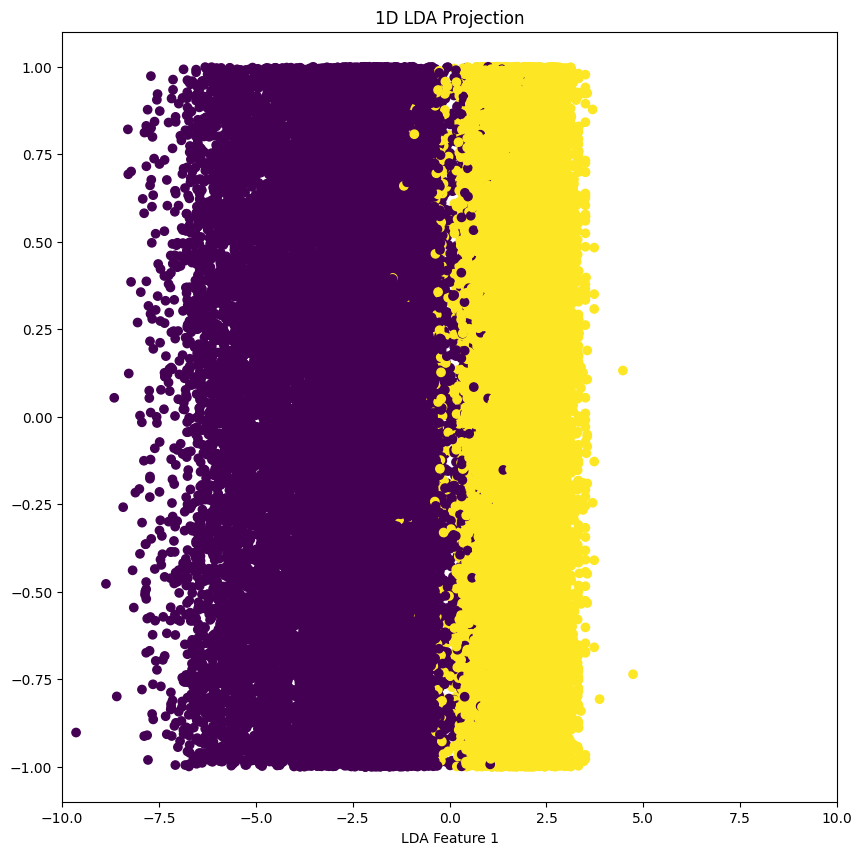

Class 0 Mean: -2.2967773217533347
Class 1 Mean: 1.7244162793200437


In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import numpy as np

lda = LDA(n_components=1)
x_train_lda = lda.fit_transform(x_train, y_train)
random_noise_y = np.random.uniform(-1, 1, size=y_train.shape) #adding random y component to reduce overlap

plt.figure(figsize=(10, 10))
plt.axis([-10, 10, -1.1, 1.1])
scatter = plt.scatter(x_train_lda, random_noise_y, c=y_train)
plt.xlabel('LDA Feature 1')
plt.title('1D LDA Projection')
plt.show()

for label in np.unique(y_train):
    lda_projection = x_train_lda[y_train == label]
    class_mean = np.mean(lda_projection)
    print(f"Class {label} Mean: {class_mean}")



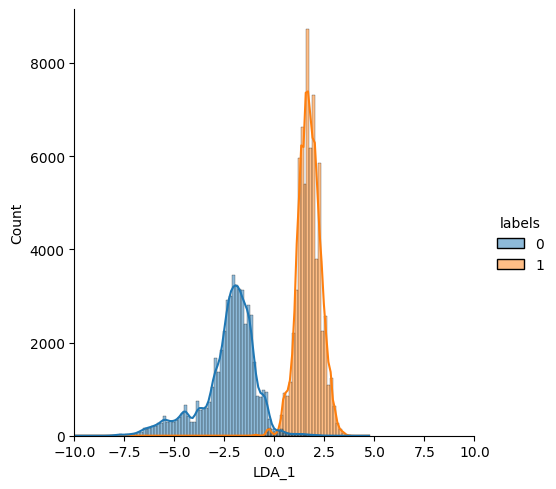

In [11]:
import seaborn as sns
x_train_lda_flat = x_train_lda.ravel()
seaborn_data = pd.DataFrame({"LDA_1": x_train_lda_flat, "labels": y_train})

sns.displot(seaborn_data, kde = True, x = "LDA_1", hue = "labels")
plt.xlim(-10, 10)
plt.show()


In [12]:
#test decision trees with the new LDA data

start_time = time.time()

model = DecisionTreeClassifier()
model.fit(x_train_lda, y_train)

end_time = time.time()
print(f'Training time: {end_time - start_time:.5f} sec')

start_time = time.time()

x_test_lda = lda.transform(x_test)
y_prediction = model.predict(x_test_lda)

end_time = time.time()
print(f'Inference time: {end_time - start_time:.5f} sec')

tpr = recall_score(y_test, y_prediction)
tnr = recall_score(y_test, y_prediction, pos_label = 0)
print("FPR:", 1-tnr)
print("FNR:", 1-tpr)

f1 = f1_score(y_test, y_prediction)
accuracy = accuracy_score(y_test, y_prediction)

print(f'Accuracy: {accuracy:.5f}')
print(f'F1 Score: {f1:.5f}')

x_org_lda = lda.transform(x)
cv_score = cross_val_score(model, x_org_lda, y, scoring='accuracy')
print(f"Accuracy Score on All Folds: {cv_score}")
print(f"Average Score on All Folds (Mean): {cv_score.mean()}")

cv_score = cross_val_score(model, x_org_lda, y, scoring='f1')
print(f"F1 Score on All Folds: {cv_score}")
print(f"F1 Score on All Folds (Mean): {cv_score.mean()}")

print(classification_report(y_test, y_prediction, zero_division=0))

Training time: 0.11001 sec
Inference time: 0.01498 sec
FPR: 0.008930875027288732
FNR: 0.0029328553865296536
Accuracy: 0.99450
F1 Score: 0.99521
Accuracy Score on All Folds: [0.99544096 0.99503806 0.99546216 0.99499565 0.99512288]
Average Score on All Folds (Mean): 0.9952119425772388
F1 Score on All Folds: [0.99601992 0.99566763 0.99603865 0.9956327  0.9957461 ]
F1 Score on All Folds (Mean): 0.9958209999345413
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     50387
           1       0.99      1.00      1.00     67511

    accuracy                           0.99    117898
   macro avg       0.99      0.99      0.99    117898
weighted avg       0.99      0.99      0.99    117898



(117897, 20)
[0.26094383 0.37067987 0.45777348 0.53465128 0.60439865 0.66718992
 0.71846751 0.76659855 0.81173646 0.85199898 0.88562423 0.91705198
 0.94562321 0.96117735 0.97197906 0.98090265 0.98853897 0.99442753
 0.99809224 1.        ]


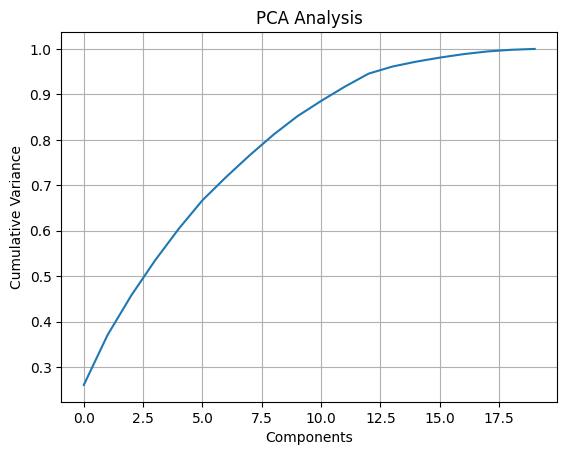

(117897, 20)
Number of components needed to capture at least 90% of the cumulative variance: 12
Number of components needed to capture at least 95% of the cumulative variance: 14
Cumulative Variance of first component: 0.26094382825833906
Cumulative Variance of first two components: 0.37067986833714966


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

std_scaler = StandardScaler()
print(x_train.shape)
x_train_scaled = std_scaler.fit_transform(x_train)
x_test_scaled = std_scaler.transform(x_test)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(std_scaler, f)

pca = PCA()
pca.fit(x_train_scaled)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(cumulative_variance)
print(cumulative_variance)
plt.title("PCA Analysis")
plt.xlabel("Components")
plt.ylabel("Cumulative Variance")
plt.grid(1)
plt.show()

print(x_train.shape)
index = np.argmax(cumulative_variance >= 0.9)
print("Number of components needed to capture at least 90% of the cumulative variance:", index+1)
index = np.argmax(cumulative_variance >= 0.95)
print("Number of components needed to capture at least 95% of the cumulative variance:", index+1)

print("Cumulative Variance of first component:", cumulative_variance[0])
print("Cumulative Variance of first two components:", cumulative_variance[1])

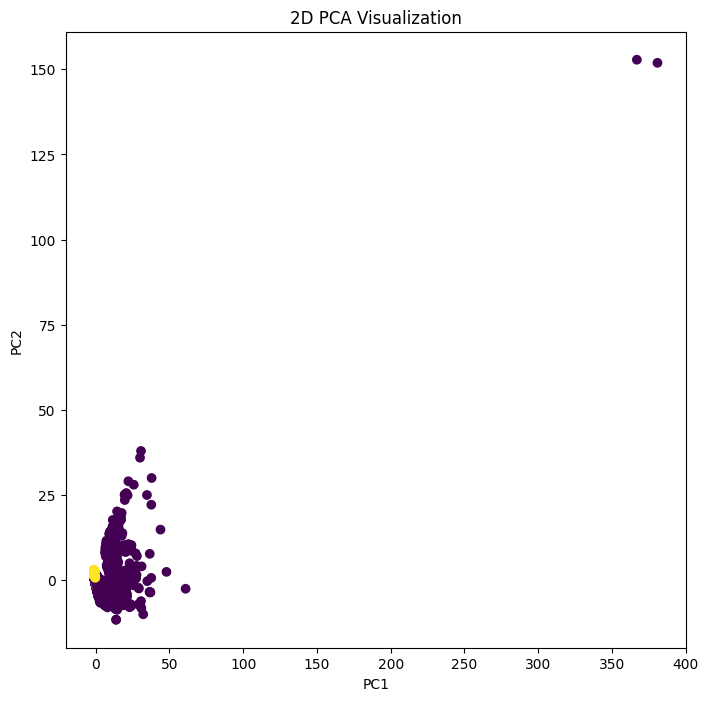

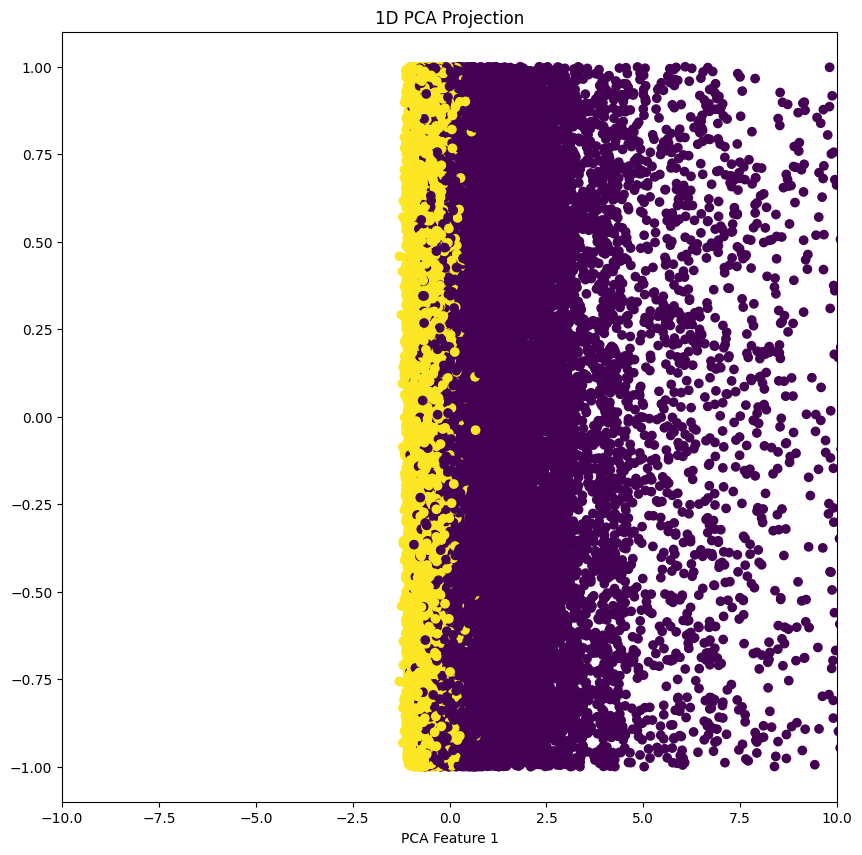

Class 0 Mean: 0.7915586634316186
Class 1 Mean: -0.5943008198187644


In [14]:
#plotting for PCA visualization in 1D and 2D and comparison to LDA

x_numpy = x.values #added due to warning of x having feature names but PCA was fitted without it

pca = PCA(n_components=14)
X_reduced_14_components = pca.fit_transform(x_train_scaled)
x_test_pca_14_components = pca.transform(x_test_scaled)
x_org_pca_14_components = pca.transform(x_numpy)

pca = PCA(n_components=2)
X_reduced_2_components = pca.fit_transform(x_train_scaled)
x_test_pca_2_components = pca.transform(x_test_scaled)
x_org_pca_2_components = pca.transform(x_numpy)

pca = PCA(n_components=1)
X_reduced_1_component = pca.fit_transform(x_train_scaled)
x_test_pca_1_component = pca.transform(x_test_scaled)
x_org_pca_1_component = pca.transform(x_numpy)

#2D Visualization
plt.figure(figsize=(8, 8))
plt.scatter(X_reduced_2_components[:, 0], X_reduced_2_components[:, 1], c=y_train)
plt.title('2D PCA Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#1D Visualization
random_noise_y = np.random.uniform(-1, 1, size=y_train.shape) #adding random y component to reduce overlap
plt.figure(figsize=(10, 10))
plt.axis([-10, 10, -1.1, 1.1])
scatter = plt.scatter(X_reduced_1_component, random_noise_y, c=y_train)
plt.xlabel('PCA Feature 1')
plt.title('1D PCA Projection')
plt.show()

for label in np.unique(y_train):
    pca_projection = X_reduced_1_component[y_train == label]
    class_mean = np.mean(pca_projection)
    print(f"Class {label} Mean: {class_mean}")

In [16]:
#test decision trees with the new PCA data
#PCA with 1 Component

start_time = time.time()

model = DecisionTreeClassifier()
model.fit(X_reduced_1_component, y_train)

end_time = time.time()
print(f'Training time: {end_time - start_time:.5f} sec')

start_time = time.time()

y_prediction = model.predict(x_test_pca_1_component)

end_time = time.time()
print(f'Inference time: {end_time - start_time:.5f} sec')

tpr = recall_score(y_test, y_prediction)
tnr = recall_score(y_test, y_prediction, pos_label = 0)
print("FPR:", 1-tnr)
print("FNR:", 1-tpr)

f1 = f1_score(y_test, y_prediction)
accuracy = accuracy_score(y_test, y_prediction)
print(f'Accuracy: {accuracy:.5f}')
print(f'F1 Score: {f1:.5f}')

cv_score = cross_val_score(model, x_org_pca_1_component, y, scoring='accuracy')
print(f"Accuracy Score on All Folds: {cv_score}")
print(f"Average Score on All Folds (Mean): {cv_score.mean()}")

cv_score = cross_val_score(model, x_org_pca_1_component, y, scoring='f1')
print(f"F1 Score on All Folds: {cv_score}")
print(f"F1 Score on All Folds (Mean): {cv_score.mean()}")

print(classification_report(y_test, y_prediction, zero_division=0))

#PCA with 2 Components
start_time = time.time()

model = DecisionTreeClassifier()
model.fit(X_reduced_2_components, y_train)

end_time = time.time()
print(f'Training time: {end_time - start_time:.5f} sec')

start_time = time.time()

y_prediction = model.predict(x_test_pca_2_components)

end_time = time.time()
print(f'Inference time: {end_time - start_time:.5f} sec')

tpr = recall_score(y_test, y_prediction)
tnr = recall_score(y_test, y_prediction, pos_label = 0)
print("FPR:", 1-tnr)
print("FNR:", 1-tpr)

f1 = f1_score(y_test, y_prediction)
accuracy = accuracy_score(y_test, y_prediction)
print(f'Accuracy: {accuracy:.5f}')
print(f'F1 Score: {f1:.5f}')

cv_score = cross_val_score(model, x_org_pca_2_components, y, scoring='accuracy')
print(f"Accuracy Score on All Folds: {cv_score}")
print(f"Average Score on All Folds (Mean): {cv_score.mean()}")

cv_score = cross_val_score(model, x_org_pca_2_components, y, scoring='f1')
print(f"F1 Score on All Folds: {cv_score}")
print(f"F1 Score on All Folds (Mean): {cv_score.mean()}")

print(classification_report(y_test, y_prediction, zero_division=0))

#PCA with 15 Components
start_time = time.time()

model = DecisionTreeClassifier()
model.fit(X_reduced_14_components, y_train)

end_time = time.time()
print(f'Training time: {end_time - start_time:.5f} sec')

start_time = time.time()

y_prediction = model.predict(x_test_pca_14_components)

end_time = time.time()
print(f'Inference time: {end_time - start_time:.5f} sec')

tpr = recall_score(y_test, y_prediction)
tnr = recall_score(y_test, y_prediction, pos_label = 0)
print("FPR:", 1-tnr)
print("FNR:", 1-tpr)

f1 = f1_score(y_test, y_prediction)
accuracy = accuracy_score(y_test, y_prediction)
print(f'Accuracy: {accuracy:.5f}')
print(f'F1 Score: {f1:.5f}')

cv_score = cross_val_score(model, x_org_pca_14_components, y, scoring='accuracy')
print(f"Accuracy Score on All Folds: {cv_score}")
print(f"Average Score on All Folds (Mean): {cv_score.mean()}")

cv_score = cross_val_score(model, x_org_pca_14_components, y, scoring='f1')
print(f"F1 Score on All Folds: {cv_score}")
print(f"F1 Score on All Folds (Mean): {cv_score.mean()}")

print(classification_report(y_test, y_prediction, zero_division=0))

Training time: 0.11622 sec
Inference time: 0.00806 sec
FPR: 0.019250997281044735
FNR: 0.00958362340951846
Accuracy: 0.98628
F1 Score: 0.98805
Accuracy Score on All Folds: [0.98763757 0.98695901 0.98731949 0.98759516 0.98761636]
Average Score on All Folds (Mean): 0.9874255179287094
F1 Score on All Folds: [0.98922545 0.98863531 0.98895048 0.98919009 0.98920996]
F1 Score on All Folds (Mean): 0.9890422593753112
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     50387
           1       0.99      0.99      0.99     67511

    accuracy                           0.99    117898
   macro avg       0.99      0.99      0.99    117898
weighted avg       0.99      0.99      0.99    117898

Training time: 0.09222 sec
Inference time: 0.00803 sec
FPR: 0.02218826284557529
FNR: 0.023359156285642335
Accuracy: 0.97714
F1 Score: 0.97997
Accuracy Score on All Folds: [0.99052143 0.99098793 0.99179372 0.99141203 0.99181492]
Average Score on All Folds (Mean):

In [17]:
from sklearn.linear_model import Perceptron

start_time = time.time()

model = Perceptron()
model.fit(x_train, y_train)

end_time = time.time()
print(f'Training time: {end_time - start_time:.5f} sec')

weights = model.coef_
bias = model.intercept_

print("Weights:", weights)
print("Bias:", bias)

start_time = time.time()

y_prediction = model.predict(x_test)

end_time = time.time()
print(f'Inference time: {end_time - start_time:.5f} sec')

tpr = recall_score(y_test, y_prediction)
tnr = recall_score(y_test, y_prediction, pos_label = 0)
print("FPR:", 1-tnr)
print("FNR:", 1-tpr)

f1 = f1_score(y_test, y_prediction)
accuracy = accuracy_score(y_test, y_prediction)
print(f'Accuracy: {accuracy:.5f}')
print(f'F1 Score: {f1:.5f}')

cv_score = cross_val_score(model, x, y, scoring='accuracy')
print(f"Accuracy Score on All Folds: {cv_score}")
print(f"Average Score on All Folds (Mean): {cv_score.mean()}")

cv_score = cross_val_score(model, x, y, scoring='f1')
print(f"F1 Score on All Folds: {cv_score}")
print(f"F1 Score on All Folds (Mean): {cv_score.mean()}")

print(classification_report(y_test, y_prediction, zero_division=0))

Training time: 0.26664 sec
Weights: [[-1.311000e+03  1.289000e+03  0.000000e+00  1.800000e+01  4.480000e+02
  -1.000000e+00 -3.000000e+00 -5.000000e-02 -2.329097e+03 -4.040000e+02
   1.602270e+02 -6.000000e+00 -6.000000e+00 -1.000000e+00 -5.650000e+02
   2.833240e+02  6.914000e+03  1.810000e+02  7.340000e+02  3.500000e+01]]
Bias: [4202.]
Inference time: 0.00587 sec
FPR: 0.0024212594518426833
FNR: 0.12901601220541836
Accuracy: 0.92509
F1 Score: 0.93015
Accuracy Score on All Folds: [0.99567421 0.99421107 0.95892619 0.98424479 0.99276914]
Average Score on All Folds (Mean): 0.9851650798362984
F1 Score on All Folds: [0.99622432 0.99493008 0.96283648 0.9864126  0.99365735]
F1 Score on All Folds (Mean): 0.9868121640758643
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     50387
           1       1.00      0.87      0.93     67511

    accuracy                           0.93    117898
   macro avg       0.93      0.93      0.92    117898
wei

Training time: 0.00000 sec
Inference time: 0.02945 sec
Normalized Mutual Information Score: 8.426956455146599e-05
F1 Score: 0.00000


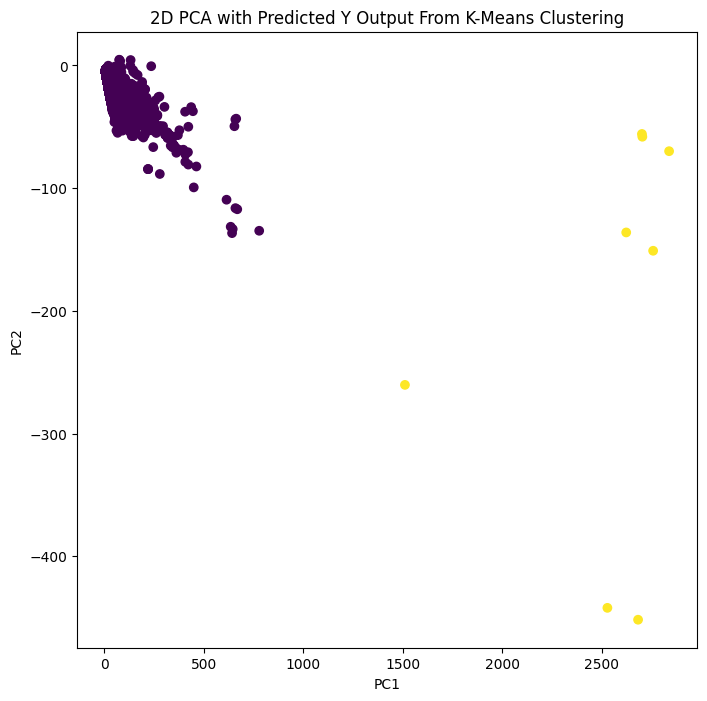

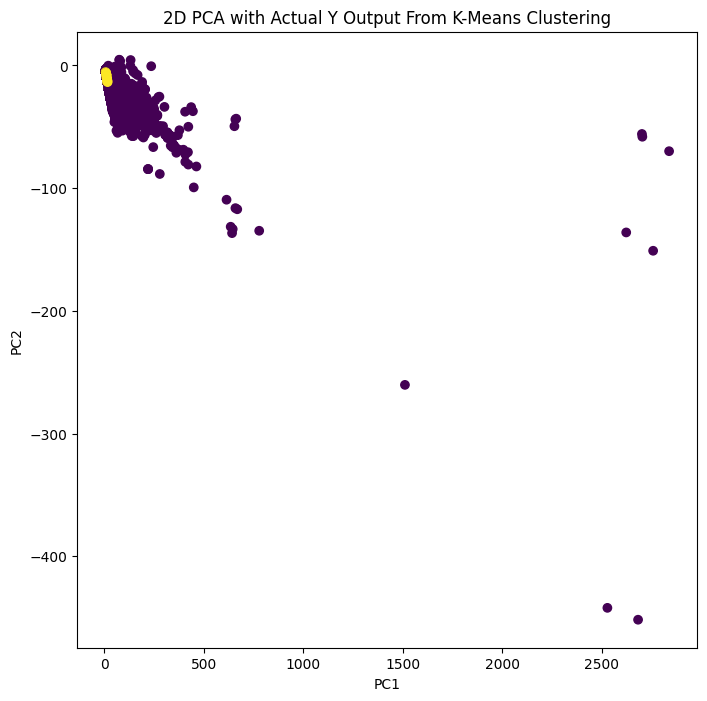

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score

start_time = time.time()

kmeans = KMeans(n_clusters=2)

end_time = time.time()
print(f'Training time: {end_time - start_time:.5f} sec')

start_time = time.time()

y_prediction = kmeans.fit_predict(x_org_pca_2_components)

end_time = time.time()
print(f'Inference time: {end_time - start_time:.5f} sec')

nmi_score = normalized_mutual_info_score(y, y_prediction)
print(f"Normalized Mutual Information Score: {nmi_score}")

f1 = f1_score(y, y_prediction)
print(f'F1 Score: {f1:.5f}')


# #############################################################################

plt.figure(figsize=(8, 8))
plt.scatter(x_org_pca_2_components[:, 0], x_org_pca_2_components[:, 1], c=y_prediction)
plt.title('2D PCA with Predicted Y Output From K-Means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(x_org_pca_2_components[:, 0], x_org_pca_2_components[:, 1], c=y)
plt.title('2D PCA with Actual Y Output From K-Means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



In [24]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2, linkage = 'ward')

np.random.seed(10)
sample_index = np.random.choice(x_org_pca_2_components.shape[0], size=10000)

x_org_pca_2_components_sampled = x_org_pca_2_components[sample_index]
y_sampled = y[sample_index]

y_prediction = model.fit_predict(x_org_pca_2_components_sampled)

nmi_score = normalized_mutual_info_score(y_sampled, y_prediction)
print(f"Normalized Mutual Information Score: {nmi_score}")

f1 = f1_score(y_sampled, y_prediction)
print(f'F1 Score: {f1:.5f}')

tpr = recall_score(y_sampled, y_prediction)
tnr = recall_score(y_sampled, y_prediction, pos_label = 0)
print("FPR:", 1-tnr)
print("FNR:", 1-tpr)

print(classification_report(y_sampled, y_prediction, zero_division=0))


model = AgglomerativeClustering(n_clusters=2, linkage = 'complete')

y_prediction = model.fit_predict(x_org_pca_2_components_sampled)

nmi_score = normalized_mutual_info_score(y_sampled, y_prediction)
print(f"Normalized Mutual Information Score: {nmi_score}")

f1 = f1_score(y_sampled, y_prediction)
print(f'F1 Score: {f1:.5f}')

tpr = recall_score(y_sampled, y_prediction)
tnr = recall_score(y_sampled, y_prediction, pos_label = 0)
print("FPR:", 1-tnr)
print("FNR:", 1-tpr)

print(classification_report(y_sampled, y_prediction, zero_division=0))

model = AgglomerativeClustering(n_clusters=2, linkage = 'average')

y_prediction = model.fit_predict(x_org_pca_2_components_sampled)

nmi_score = normalized_mutual_info_score(y_sampled, y_prediction)
print(f"Normalized Mutual Information Score: {nmi_score}")

f1 = f1_score(y_sampled, y_prediction)
print(f'F1 Score: {f1:.5f}')

tpr = recall_score(y_sampled, y_prediction)
tnr = recall_score(y_sampled, y_prediction, pos_label = 0)
print("FPR:", 1-tnr)
print("FNR:", 1-tpr)

print(classification_report(y_sampled, y_prediction, zero_division=0))

model = AgglomerativeClustering(n_clusters=2, linkage = 'single')

y_prediction = model.fit_predict(x_org_pca_2_components_sampled)

nmi_score = normalized_mutual_info_score(y_sampled, y_prediction)
print(f"Normalized Mutual Information Score: {nmi_score}")

f1 = f1_score(y_sampled, y_prediction)
print(f'F1 Score: {f1:.5f}')

tpr = recall_score(y_sampled, y_prediction)
tnr = recall_score(y_sampled, y_prediction, pos_label = 0)
print("FPR:", 1-tnr)
print("FNR:", 1-tpr)

print(classification_report(y_sampled, y_prediction, zero_division=0))



Normalized Mutual Information Score: 0.013253690999095772
F1 Score: 0.00000
FPR: 0.013044491031912409
FNR: 1.0
              precision    recall  f1-score   support

           0       0.43      0.99      0.60      4293
           1       0.00      0.00      0.00      5707

    accuracy                           0.42     10000
   macro avg       0.21      0.49      0.30     10000
weighted avg       0.18      0.42      0.26     10000

Normalized Mutual Information Score: 0.0017193908986768683
F1 Score: 0.00000
FPR: 0.0016305613789890927
FNR: 1.0
              precision    recall  f1-score   support

           0       0.43      1.00      0.60      4293
           1       0.00      0.00      0.00      5707

    accuracy                           0.43     10000
   macro avg       0.21      0.50      0.30     10000
weighted avg       0.18      0.43      0.26     10000

Normalized Mutual Information Score: 0.005333731242494969
F1 Score: 0.72770
FPR: 0.9948753785231773
FNR: 0.0
             

In [28]:
from sklearn.svm import SVC


np.random.seed(10)
sample_index = np.random.choice(x_train_scaled.shape[0], size=10000)
x_train_sampled = x_train_scaled[sample_index]
y_train_sampled = y_train.iloc[sample_index]

sample_index = np.random.choice(x_test_scaled.shape[0], size=100000)
x_test_sampled = x_test_scaled[sample_index]
y_test_sampled = y_test.iloc[sample_index]

start_time = time.time()

model = SVC()
model.fit(x_train_sampled, y_train_sampled)

end_time = time.time()
print(f'Training time: {end_time - start_time:.5f} sec')

start_time = time.time()

y_prediction = model.predict(x_test_sampled)

end_time = time.time()
print(f'Inference time: {end_time - start_time:.5f} sec')

tpr = recall_score(y_test_sampled, y_prediction)
tnr = recall_score(y_test_sampled, y_prediction, pos_label = 0)
print("FPR:", 1-tnr)
print("FNR:", 1-tpr)

f1 = f1_score(y_test_sampled, y_prediction)
accuracy = accuracy_score(y_test_sampled, y_prediction)
print(f'Accuracy: {accuracy:.5f}')
print(f'F1 Score: {f1:.5f}')

print(classification_report(y_test_sampled, y_prediction, zero_division=0))

with open('svm_classification_model.pkl', 'wb') as f:
    pickle.dump(model, f)

#try with unscaled data

np.random.seed(10)
sample_index = np.random.choice(x_train.shape[0], size=10000)
x_train_sampled = x_train.iloc[sample_index]
y_train_sampled = y_train.iloc[sample_index]

sample_index = np.random.choice(x_test.shape[0], size=100000)
x_test_sampled = x_test.iloc[sample_index]
y_test_sampled = y_test.iloc[sample_index]

start_time = time.time()

model = SVC()
model.fit(x_train_sampled, y_train_sampled)

end_time = time.time()
print(f'Training time: {end_time - start_time:.5f} sec')

start_time = time.time()

y_prediction = model.predict(x_test_sampled)
end_time = time.time()
print(f'Inference time: {end_time - start_time:.5f} sec')

tpr = recall_score(y_test_sampled, y_prediction)
tnr = recall_score(y_test_sampled, y_prediction, pos_label = 0)
print("FPR:", 1-tnr)
print("FNR:", 1-tpr)

f1 = f1_score(y_test_sampled, y_prediction)
accuracy = accuracy_score(y_test_sampled, y_prediction)
print(f'Accuracy: {accuracy:.5f}')
print(f'F1 Score: {f1:.5f}')

print(classification_report(y_test_sampled, y_prediction, zero_division=0))

Training time: 0.09874 sec
Inference time: 1.50558 sec
FPR: 0.008348491208432396
FNR: 0.0004551980111348053
Accuracy: 0.99616
F1 Score: 0.99665
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     42882
           1       0.99      1.00      1.00     57118

    accuracy                           1.00    100000
   macro avg       1.00      1.00      1.00    100000
weighted avg       1.00      1.00      1.00    100000

Training time: 0.97818 sec
Inference time: 16.23269 sec
FPR: 0.07385383144442892
FNR: 0.005199761896424904
Accuracy: 0.96536
F1 Score: 0.97042
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     42882
           1       0.95      0.99      0.97     57118

    accuracy                           0.97    100000
   macro avg       0.97      0.96      0.96    100000
weighted avg       0.97      0.97      0.97    100000



In [22]:
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()

model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train, y_train)

end_time = time.time()
print(f'Training time: {end_time - start_time:.5f} sec')

start_time = time.time()

y_prediction = model.predict(x_test)

end_time = time.time()
print(f'Inference time: {end_time - start_time:.5f} sec')

tpr = recall_score(y_test, y_prediction)
tnr = recall_score(y_test, y_prediction, pos_label = 0)
print("FPR:", 1-tnr)
print("FNR:", 1-tpr)

f1 = f1_score(y_test, y_prediction)
accuracy = accuracy_score(y_test, y_prediction)
print(f'Accuracy: {accuracy:.5f}')
print(f'F1 Score: {f1:.5f}')

print(classification_report(y_test, y_prediction, zero_division=0))

Training time: 0.01139 sec
Inference time: 5.07226 sec
FPR: 0.00494175084843318
FNR: 0.002947667787471686
Accuracy: 0.99620
F1 Score: 0.99668
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50387
           1       1.00      1.00      1.00     67511

    accuracy                           1.00    117898
   macro avg       1.00      1.00      1.00    117898
weighted avg       1.00      1.00      1.00    117898

